In [1]:
from sklearn import datasets
boston = datasets.load_boston()

/home/osman/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing data

In [2]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [3]:
import pandas as pd
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df["MEDV"] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Text(0, 0.5, 'MEDV')

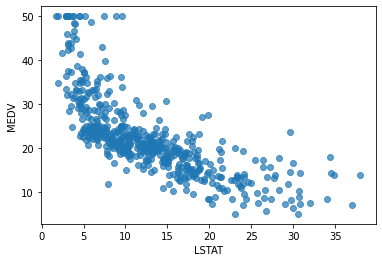

In [4]:
import matplotlib.pyplot as plt
plt.scatter(boston_df["LSTAT"], boston_df["MEDV"], alpha=0.7)
plt.xlabel("LSTAT")
plt.ylabel("MEDV")


In [5]:
lstat = boston_df[["LSTAT"]].values
medv = boston_df["MEDV"].values


In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(lstat, medv)

LinearRegression()

Text(0, 0.5, 'MEDV')

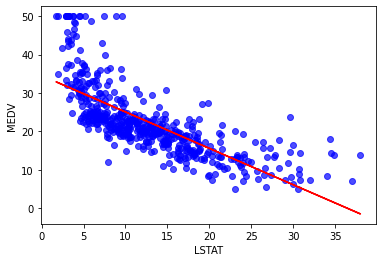

In [7]:
import matplotlib.pyplot as plt
plt.scatter(lstat, medv, color="blue", alpha=0.7)
plt.plot(lstat, model.predict(lstat), color="red")
plt.xlabel("LSTAT")
plt.ylabel("MEDV")


In [8]:
print(f"Slope: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Slope: [-0.95004935]
Intercept: 34.5538408793831


>  medv = 34.55 - 0.95 * lstat


In [9]:
x = boston_df[["LSTAT", "AGE"]].values
y = boston_df["MEDV"].values

In [10]:
model2 = LinearRegression()
model2.fit(x, y)
print(f"Intercept: {model2.intercept_}")
print(f"Slope: {model2.coef_}")

Intercept: 33.2227605317929
Slope: [-1.03206856  0.03454434]


In [11]:
x = boston_df.drop(["MEDV"], axis=1)
y = boston_df["MEDV"]
model = LinearRegression()
model.fit(x, y)
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_}")

Intercept: 36.459488385089955
Slope: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


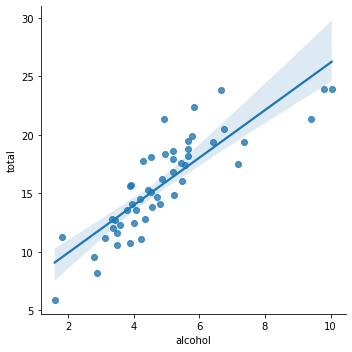

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

car_crashes = sns.load_dataset("car_crashes")
sns.lmplot(x="alcohol", y="total", data=car_crashes)


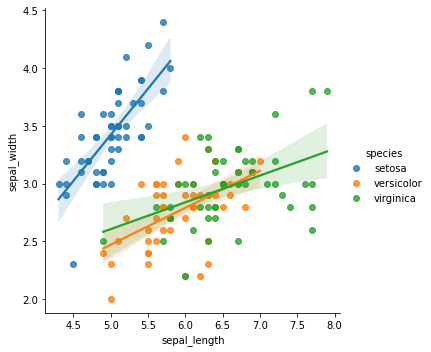

In [13]:
iris = sns.load_dataset("iris")
sns.lmplot(x="sepal_length", y="sepal_width", hue="species", data=iris)

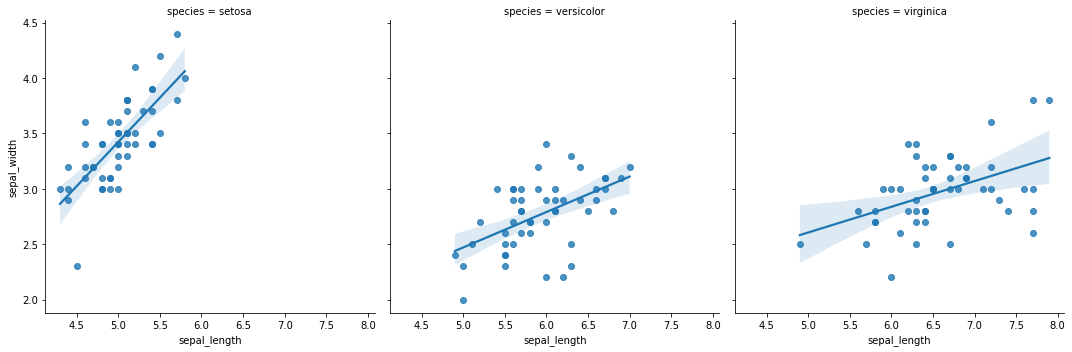

In [15]:
sns.lmplot(x="sepal_length", y="sepal_width", col="species", data=iris)

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

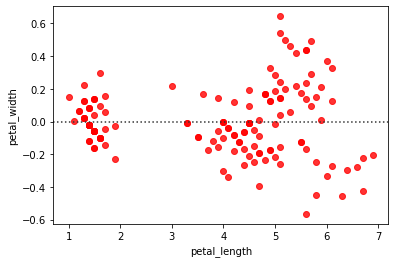

In [16]:
sns.residplot(x="petal_length", y="petal_width", data=iris, color="red")

In [18]:
x = boston_df[["LSTAT", "AGE"]].values
y = boston_df["MEDV"].values
model2 = LinearRegression()
model2.fit(x, y)
model2.score(x, y)

0.5512689379421003